In [3]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from utils.init import *

token ready
local simulator ready
aer_simulator


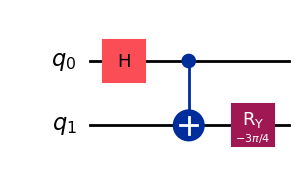

In [4]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-3. * np.pi / 4., 1)

circuit.draw('mpl')

In [5]:
def get_statevector_array(circuit):
    # 渡された回路のコピーを使う
    circuit = circuit.copy()
    # 量子回路の終状態の状態ベクトルを保存するインストラクション
    circuit.save_statevector()
    # 再び「おまじない」のtranspileをしてから、run()に渡す
    circuit = transpile(circuit, backend=simulator)
    job = simulator.run(circuit)
    result = job.result()
    qiskit_statevector = result.data()['statevector']

    # result.data()['statevector']は通常の配列オブジェクト（ndarray）ではなくqiskit独自のクラスのインスタンス
    # ただし np.asarray() で numpy の ndarray に変換可能
    return np.asarray(qiskit_statevector)

statevector = get_statevector_array(circuit)
print(type(statevector), statevector.dtype)
print(statevector)

<class 'numpy.ndarray'> complex128
[ 0.27059805+0.j  0.65328148+0.j -0.65328148+0.j  0.27059805+0.j]


In [6]:
expr = statevector_expr(statevector)

# Math()はLaTeXをタイプセットする関数
Math(expr)

<IPython.core.display.Math object>

In [7]:
circuit = QuantumCircuit(1)
##################
### EDIT BELOW ###
##################
circuit.h(0)
circuit.p(np.pi / 2., 0)
##################
### EDIT ABOVE ###
##################

expr = statevector_expr(circuit, amp_norm=(np.sqrt(0.5), r'\frac{1}{\sqrt{2}}'))
Math(expr)

<IPython.core.display.Math object>

In [8]:
circuit = QuantumCircuit(2)

##################
### EDIT BELOW ###
##################
circuit.h(0)
circuit.p(np.pi / 2., 0)
circuit.cx(0, 1)
##################
### EDIT ABOVE ###
##################

expr = statevector_expr(circuit, amp_norm=(np.sqrt(0.5), r'\frac{1}{\sqrt{2}}'))
Math(expr)

<IPython.core.display.Math object>

In [9]:
circuit = QuantumCircuit(3)

##################
### EDIT BELOW ###
##################
circuit.h(0)
circuit.cx(0, 1)
circuit.mcx([0, 1], 2)
##################
### EDIT ABOVE ###
##################

expr = statevector_expr(circuit, amp_norm=(np.sqrt(0.5), r'\frac{1}{\sqrt{2}}'))
Math(expr)

<IPython.core.display.Math object>

In [10]:
num_qubits = 4

circuit = QuantumCircuit(num_qubits)

##################
### EDIT BELOW ###
##################
for i in range(4):
    circuit.h(i)
##################
### EDIT ABOVE ###
##################

sqrt_2_to_n = 2 ** (num_qubits // 2)
expr = statevector_expr(circuit, amp_norm=(1. / sqrt_2_to_n, r'\frac{1}{%d}' % sqrt_2_to_n))
Math(expr)

<IPython.core.display.Math object>

In [11]:
num_qubits = 4

circuit = QuantumCircuit(num_qubits)

##################
### EDIT BELOW ###
##################
for i in range(4):
    circuit.h(i)

circuit.x(1)
circuit.x(3)
circuit.mcp(np.pi, [0, 1, 2], 3)
circuit.x(1) # Xの逆操作はX
circuit.x(3)
##################
### EDIT ABOVE ###
##################

sqrt_2_to_n = 2 ** (num_qubits // 2)
expr = statevector_expr(circuit, amp_norm=(1. / sqrt_2_to_n, r'\frac{1}{%d}' % sqrt_2_to_n))
Math(expr)

<IPython.core.display.Math object>

In [12]:
num_qubits = 6

circuit = QuantumCircuit(num_qubits)

s = 2.5

##################
### EDIT BELOW ###
##################
for m in range(num_qubits):
    circuit.h(m)
    circuit.p(2. * np.pi * s / (2 ** (num_qubits - m)), m)
##################
### EDIT ABOVE ###
##################

sqrt_2_to_n = 2 ** (num_qubits // 2)
amp_norm = (1. / sqrt_2_to_n, r'\frac{1}{%d}' % sqrt_2_to_n)
phase_norm = (2 * np.pi / (2 ** num_qubits), r'\frac{2 \pi i}{%d}' % (2 ** num_qubits))
expr = statevector_expr(circuit, amp_norm, phase_norm=phase_norm)
Math(expr)

<IPython.core.display.Math object>

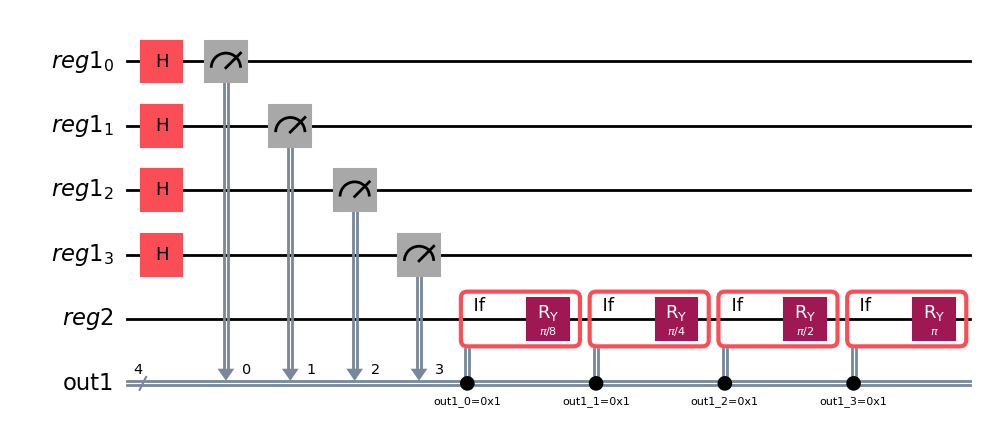

In [15]:
register1 = QuantumRegister(4, name='reg1')
register2 = QuantumRegister(1, name='reg2')
output1 = ClassicalRegister(4, name='out1') # 測定結果を保持する「古典レジスタ」オブジェクト

circuit = QuantumCircuit(register1, register2, output1)

# register1にequal superpositionを実現
circuit.h(register1)
# register1を測定し、結果をoutput1に書き込む
circuit.measure(register1, output1)

# output1の各位iの0/1に応じて、dtheta * 2^iだけRyをかけると、全体としてRy(2pi * j/16)が実現する
dtheta = 2. * np.pi / 16.

for idx in range(4):
    # circuit.***.c_if(classical_bit, 1) <- classical_bitが1のときに***ゲートをかける
    angle = dtheta * (2 ** idx)
    # circuit.ry(angle, register2[0]).c_if(output1[idx], 1)
    with circuit.if_test((output1[idx], 1)):
        circuit.ry(angle, register2[0])

circuit.draw('mpl')

In [25]:
Math(statevector_expr(circuit, register_sizes=[4, 1]))

# cos(pi*0/16) = 1.000, sin(pi*0/16) = 0.000
# cos(pi*1/16) = 0.981, sin(pi*1/16) = 0.195
# cos(pi*2/16) = 0.924, sin(pi*2/16) = 0.383
# cos(pi*3/16) = 0.831, sin(pi*3/16) = 0.556
# cos(pi*4/16) = 0.707, sin(pi*4/16) = 0.707
# cos(pi*5/16) = 0.556, sin(pi*5/16) = 0.831
# cos(pi*6/16) = 0.383, sin(pi*6/16) = 0.924
# cos(pi*7/16) = 0.195, sin(pi*7/16) = 0.981
# cos(pi*8/16) = 0.000, sin(pi*8/16) = 1.000
# cos(pi*9/16) = -0.195, sin(pi*9/16) = 0.981
# cos(pi*10/16) = -0.383, sin(pi*10/16) = 0.924
# cos(pi*11/16) = -0.556, sin(pi*11/16) = 0.831
# cos(pi*12/16) = -0.707, sin(pi*12/16) = 0.707
# cos(pi*13/16) = -0.831, sin(pi*13/16) = 0.556
# cos(pi*14/16) = -0.924, sin(pi*14/16) = 0.383
# cos(pi*15/16) = -0.981, sin(pi*15/16) = 0.195

<IPython.core.display.Math object>

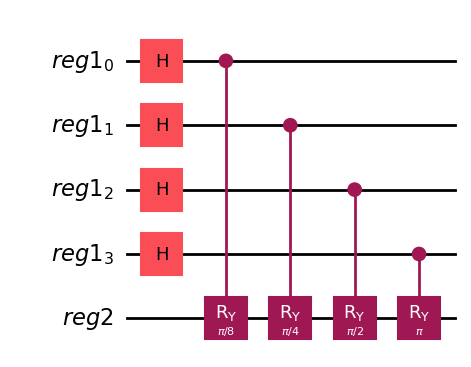

In [26]:
register1 = QuantumRegister(4, name='reg1')
register2 = QuantumRegister(1, name='reg2')

circuit = QuantumCircuit(register1, register2)

circuit.h(register1)

dtheta = 2. * np.pi / 16.

for idx in range(4):
    circuit.cry(dtheta * (2 ** idx), register1[idx], register2[0])

circuit.draw('mpl')

In [27]:
lines = statevector_expr(circuit, register_sizes=[4, 1], terms_per_row=6)
Math(r' \\ '.join(lines))

<IPython.core.display.Math object>

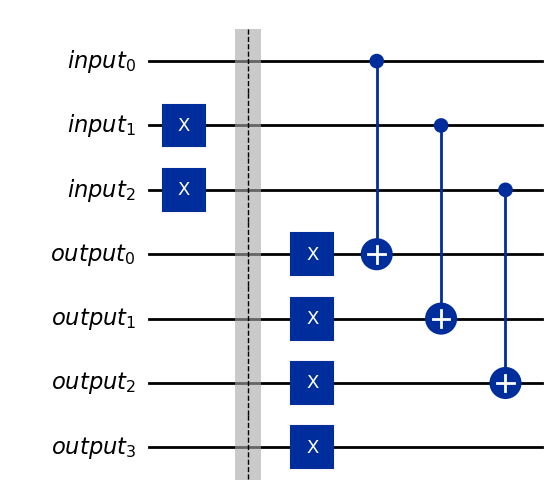

In [28]:
input_register = QuantumRegister(3, name='input')
output_register = QuantumRegister(4, name='output')

circuit = QuantumCircuit(input_register, output_register)

# input_registerに適当な値（6）を入力
circuit.x(input_register[1])
circuit.x(input_register[2])

circuit.barrier()

# ここからが引き算をするU_f
# まずoutput_registerの全てのビットを立てる
circuit.x(output_register)
for idx in range(3):
    # その上で、CNOTを使ってinput_registerでビットが1である時にoutput_registerの対応するビットが0にする
    circuit.cx(input_register[idx], output_register[idx])

circuit.draw('mpl')

In [29]:
Math(statevector_expr(circuit, register_sizes=[3, 4]))

<IPython.core.display.Math object>

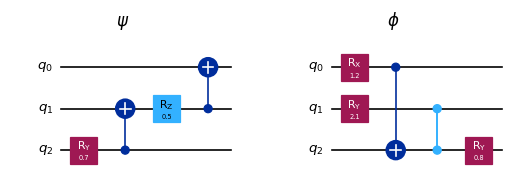

In [30]:
data_width = 3

fig, axs = plt.subplots(1, 2)

# 適当な状態|ψ>を作る回路
psi_circuit = QuantumCircuit(data_width, name='|ψ>')
psi_circuit.ry(0.7, 2)
psi_circuit.cx(2, 1)
psi_circuit.rz(0.5, 1)
psi_circuit.cx(1, 0)
psi_circuit.draw('mpl', ax=axs[0])
axs[0].set_title(r'$\psi$')

# 適当な状態|φ>を作る回路
phi_circuit = QuantumCircuit(data_width, name='|φ>')
phi_circuit.rx(1.2, 0)
phi_circuit.ry(2.1, 1)
phi_circuit.cx(0, 2)
phi_circuit.cz(1, 2)
phi_circuit.ry(0.8, 2)
phi_circuit.draw('mpl', ax=axs[1])
axs[1].set_title(r'$\phi$')

# パーツが全て揃ったので、内積を計算する回路を作る
reg_data1 = QuantumRegister(data_width, name='data1')
reg_data2 = QuantumRegister(data_width, name='data2')
reg_test = QuantumRegister(1, name='test')
out = ClassicalRegister(1, name='out')

circuit = QuantumCircuit(reg_data1, reg_data2, reg_test, out, name='SWAP_test')
# 状態|ψ>と|φ>をデータレジスタに実現
# 他の回路や別に定義したゲートを回路オブジェクトに組み込むときはappend()メソッドを使う
# qargsでもとの回路の量子ビットを組み込み先のどの量子ビットに対応させるかを指定する
circuit.append(psi_circuit, qargs=reg_data1)
circuit.append(phi_circuit, qargs=reg_data2)

# 回路図が見やすくなるようにバリアを入れる（計算上は何もしない操作）
circuit.barrier()

# ここからがSWAPテスト
circuit.h(reg_test)

for idx in range(data_width):
    circuit.cswap(reg_test[0], reg_data1[idx], reg_data2[idx])

circuit.h(reg_test)

circuit.measure(reg_test, out)

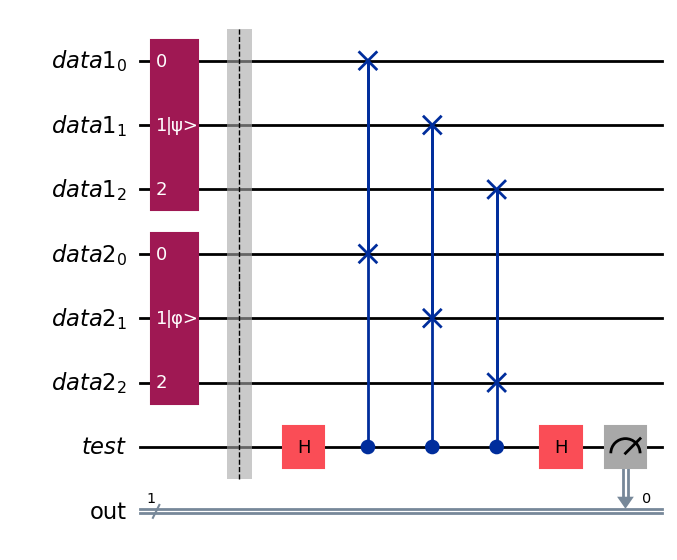

In [31]:
circuit.draw('mpl')

In [32]:
Math(statevector_expr(psi_circuit, state_label=r'\psi'))

<IPython.core.display.Math object>

In [33]:
Math(statevector_expr(phi_circuit, state_label=r'\phi'))

<IPython.core.display.Math object>

In [34]:
sv_psi = get_statevector_array(psi_circuit)
sv_phi = get_statevector_array(phi_circuit)
print(np.square(np.abs(np.sum(sv_psi.conjugate() * sv_phi))))

0.20287760299395322


In [36]:
simulator = AerSimulator()
sampler = LocalSampler()
shots = 1000000

circuit = transpile(circuit, backend=simulator)
job_result = sampler.run([circuit], shots=shots).result()
counts = job_result[0].data.out.get_counts()

print((counts['0'] - counts['1']) / shots)

0.201334


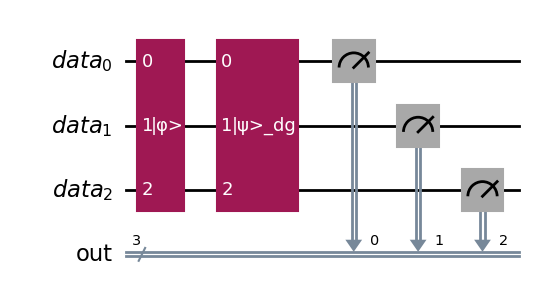

In [37]:
reg_data = QuantumRegister(data_width, name='data')
out = ClassicalRegister(data_width, name='out')

circuit = QuantumCircuit(reg_data, out)

circuit.append(phi_circuit, qargs=reg_data)
# psi_circuit.inverse() -> psi_circuitの逆回路
circuit.append(psi_circuit.inverse(), qargs=reg_data)

# 量子ビット[0, 1, 2, ...]を測定し、結果を古典ビット[0, 1, 2, ...]に書き出す
circuit.measure(range(data_width), range(data_width))

circuit.draw('mpl')

In [38]:
shots = 1000000

circuit = transpile(circuit, backend=simulator)
job_result = sampler.run([circuit], shots=shots).result()
counts = job_result[0].data.out.get_counts()

print(counts['000'] / shots)

0.203176


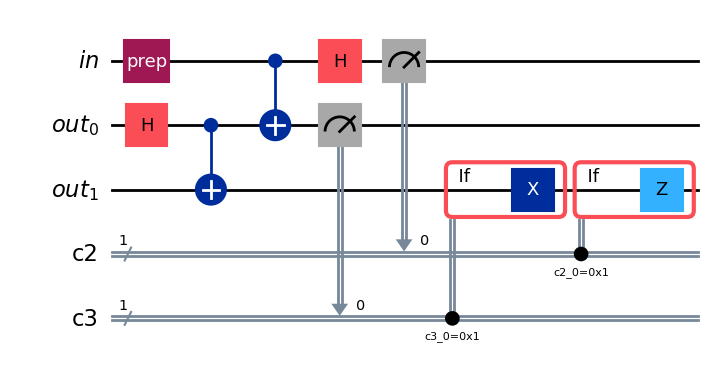

In [40]:
# まずは入力ビットを適当な状態にする回路を作る
# circuit.u (U3 gate)は3パラメータで一つの量子ビットを完全にコントロールするゲート
prep_circuit = QuantumCircuit(1, name='prep')
prep_circuit.u(0.7, 1.8, 2.1, 0)

reg_in = QuantumRegister(1, name='in')
reg_out = QuantumRegister(2, name='out')
res_in = ClassicalRegister(1)
res_ent = ClassicalRegister(1)

circuit = QuantumCircuit(reg_in, reg_out, res_in, res_ent)

# まずreg_inをprep_circuitの状態にする
circuit.append(prep_circuit, qargs=reg_in)

# reg_outはベル状態に用意する
circuit.h(reg_out[0])
circuit.cx(reg_out[0], reg_out[1])

# reg_inとreg_outの第一ビットをエンタングルさせる
circuit.cx(reg_in[0], reg_out[0])

# reg_inにアダマールゲートをかけ、測定する
circuit.h(reg_in[0])
circuit.measure(reg_in[0], res_in[0])

# reg_outのエンタングルしたビットも測定する
circuit.measure(reg_out[0], res_ent[0])

# reg_out[1]にreg_in, reg_entの測定結果に応じたゲートをかける
# circuit.x(reg_out[1]).c_if(res_ent[0], 1)
with circuit.if_test((res_ent[0], 1)):
    circuit.x(reg_out[1])
# circuit.z(reg_out[1]).c_if(res_in[0], 1)
with circuit.if_test((res_in[0], 1)):
    circuit.z(reg_out[1])

circuit.draw('mpl')

In [41]:
Math(statevector_expr(prep_circuit, state_label=r'\text{in}'))

<IPython.core.display.Math object>

In [42]:
Math(statevector_expr(circuit, register_sizes=(1, 1, 1)))

<IPython.core.display.Math object>